# Quantum Mechanics I: Complete Foundations with Full Derivations

## A Comprehensive Guide with Mathematical Details and Detailed Python Implementations

This notebook is designed to teach quantum mechanics from first principles with **no shortcuts**. Every equation is derived, every concept explained, and every line of code is extensively commented to show exactly what is happening at each step.

### What You Will Learn:
1. The fundamental postulates of quantum mechanics
2. The wave function and probability interpretation
3. Complete derivation of the Schrödinger equation
4. Solving the time-independent Schrödinger equation
5. The infinite square well (particle in a box) with complete derivation
6. The harmonic oscillator with full mathematical treatment
7. Expectation values, uncertainties, and the uncertainty principle
8. Working code that demonstrates every concept with detailed comments

---

## 2. The Wave Function and Born Interpretation

### Key Concepts

The **wave function** $\psi(x,t)$ is the fundamental object in quantum mechanics. It encodes all information about a quantum system.

**Born Rule:** The probability of finding a particle at position $x$ is:
$$P(x) = |\psi(x)|^2$$

**Normalization condition:**
$$\int_{-\infty}^{\infty} |\psi(x)|^2 dx = 1$$

### Example: Gaussian Wave Packet

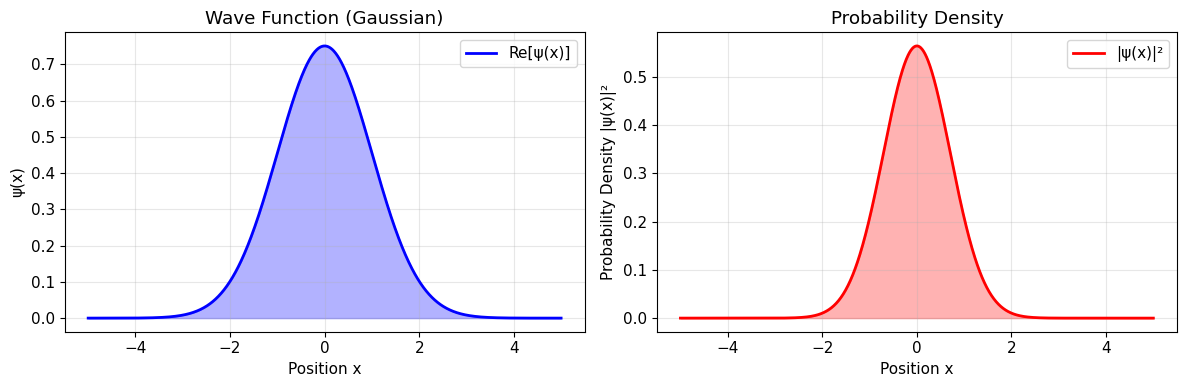

Normalization check: ∫|ψ|² dx = 1.000000


In [3]:
# Define a Gaussian wave packet
x = np.linspace(-5, 5, 1000)
x0 = 0  # center
sigma = 1.0  # width (uncertainty in position)

# Unnormalized Gaussian
psi = np.exp(-(x - x0)**2 / (2*sigma**2))

# Normalize
dx = x[1] - x[0]
norm = np.sqrt(np.sum(np.abs(psi)**2) * dx)
psi = psi / norm

# Probability density
prob_density = np.abs(psi)**2

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(x, np.real(psi), label='Re[ψ(x)]', color='blue', linewidth=2)
ax1.fill_between(x, 0, np.real(psi), alpha=0.3, color='blue')
ax1.set_xlabel('Position x')
ax1.set_ylabel('ψ(x)')
ax1.set_title('Wave Function (Gaussian)')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(x, prob_density, label='|ψ(x)|²', color='red', linewidth=2)
ax2.fill_between(x, 0, prob_density, alpha=0.3, color='red')
ax2.set_xlabel('Position x')
ax2.set_ylabel('Probability Density |ψ(x)|²')
ax2.set_title('Probability Density')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Check normalization
integral = np.sum(prob_density) * dx
print(f'Normalization check: ∫|ψ|² dx = {integral:.6f}')

## 3. The Time-Dependent Schrödinger Equation

The fundamental equation of quantum mechanics:
$$i\hbar \frac{\partial \psi}{\partial t} = \hat{H} \psi$$

where $\hat{H}$ is the Hamiltonian (energy operator):
$$\hat{H} = -\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2} + V(x)$$

For a particle in a **potential** $V(x)$:
- Kinetic energy: $\hat{T} = -\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2}$
- Potential energy: $\hat{V} = V(x)$

### Stationary States

If the potential is time-independent, we can separate variables: $\psi(x,t) = \psi(x) e^{-iEt/\hbar}$

This gives the **time-independent Schrödinger equation:**
$$-\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + V(x)\psi = E\psi$$

## 4. The Infinite Square Well

A particle confined to a box: $V(x) = 0$ for $0 < x < L$, and $V(x) = \infty$ elsewhere.

**Boundary conditions:** $\psi(0) = \psi(L) = 0$ (wave function vanishes at walls)

### Analytical Solution

The normalized energy eigenstates are:
$$\psi_n(x) = \sqrt{\frac{2}{L}} \sin\left(\frac{n\pi x}{L}\right), \quad n = 1, 2, 3, \ldots$$

with energies:
$$E_n = \frac{n^2 \pi^2 \hbar^2}{2mL^2}$$

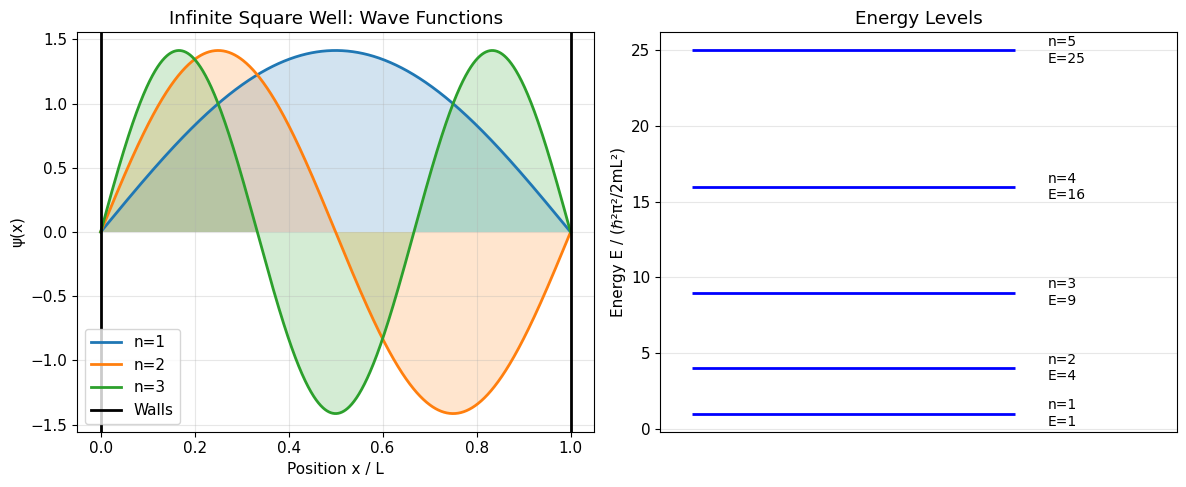

Infinite Square Well Solutions:
Box width L = 1.0

Energy levels (in units of ℏ²π²/2mL²):
  E_1 = 1
  E_2 = 4
  E_3 = 9
  E_4 = 16
  E_5 = 25


In [4]:
# Infinite square well: n=1,2,3 states
L = 1.0  # Box width (set to 1 for simplicity)
x_well = np.linspace(0, L, 1000)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot wave functions for n=1, 2, 3
for n in [1, 2, 3]:
    psi_n = np.sqrt(2/L) * np.sin(n * np.pi * x_well / L)
    ax1.plot(x_well, psi_n, label=f'n={n}', linewidth=2)
    ax1.fill_between(x_well, 0, psi_n, alpha=0.2)

ax1.axvline(x=0, color='black', linewidth=2, label='Walls')
ax1.axvline(x=L, color='black', linewidth=2)
ax1.set_xlabel('Position x / L')
ax1.set_ylabel('ψ(x)')
ax1.set_title('Infinite Square Well: Wave Functions')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-0.05, L+0.05)

# Plot energy levels
n_vals = np.arange(1, 6)
# E_n ∝ n² (using ℏ²/(2mL²) = 1 in these units)
E_vals = n_vals**2

for i, (n, E) in enumerate(zip(n_vals, E_vals)):
    ax2.hlines(E, 0, 1, colors='blue', linewidth=2)
    ax2.text(1.1, E, f'n={n}\nE={E}', va='center', fontsize=10)

ax2.set_xlim(-0.1, 1.5)
ax2.set_ylabel('Energy E / (ℏ²π²/2mL²)')
ax2.set_title('Energy Levels')
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_xticks([])

plt.tight_layout()
plt.show()

print('Infinite Square Well Solutions:')
print(f'Box width L = {L}')
print(f'\nEnergy levels (in units of ℏ²π²/2mL²):')
for n in range(1, 6):
    print(f'  E_{n} = {n**2}')

## 5. Expectation Values and Observables

In quantum mechanics, physical observables are represented by **Hermitian operators** $\hat{A}$.

The **expectation value** (average measurement result) is:
$$\langle A \rangle = \int_{-\infty}^{\infty} \psi^* \hat{A} \psi \, dx$$

### Common Observables

**Position:**
$$\langle x \rangle = \int x |\psi(x)|^2 dx$$

**Momentum:**
$$\langle p \rangle = \int \psi^* \left(-i\hbar \frac{d}{dx}\right) \psi \, dx$$

**Kinetic energy:**
$$\langle T \rangle = \frac{\langle p^2 \rangle}{2m}$$

### Uncertainty Principle

$$\Delta x \cdot \Delta p \geq \frac{\hbar}{2}$$

where $\Delta A = \sqrt{\langle A^2 \rangle - \langle A \rangle^2}$

In [5]:
# Compute expectation values for infinite square well, n=1
L = 1.0
x = np.linspace(0, L, 2000)
n = 1
dx = x[1] - x[0]

# Wave function
psi = np.sqrt(2/L) * np.sin(n * np.pi * x / L)
prob_density = np.abs(psi)**2

# ⟨x⟩
x_expect = np.sum(x * prob_density) * dx

# ⟨x²⟩
x2_expect = np.sum(x**2 * prob_density) * dx

# Δx
delta_x = np.sqrt(x2_expect - x_expect**2)

print(f'Infinite Square Well (n={n}, L={L})')
print(f'\n⟨x⟩ = {x_expect:.6f} × L')
print(f'⟨x²⟩ = {x2_expect:.6f} × L²')
print(f'Δx = {delta_x:.6f} × L')
print(f'\nTheoretical prediction: ⟨x⟩ = L/2 = {L/2}')
print(f'Theoretical Δx for n=1: L√(1/3 - 1/2π²) ≈ {L * np.sqrt(1/3 - 1/(2*np.pi**2)):.6f}')

# For momentum in infinite square well (by symmetry, ⟨p⟩ = 0)
# But ⟨p²⟩ = (nπℏ/L)²
hbar = 1.0  # Set ℏ = 1
p2_expect = (n * np.pi * hbar / L)**2
delta_p = np.sqrt(p2_expect)  # since ⟨p⟩ = 0

print(f'\n⟨p⟩ = 0 (by symmetry)')
print(f'⟨p²⟩ = {p2_expect:.6f}')
print(f'Δp = {delta_p:.6f}')

# Uncertainty product
uncertainty_product = delta_x * delta_p
print(f'\nΔx × Δp = {uncertainty_product:.6f}')
print(f'ℏ/2 = {hbar/2:.6f}')
print(f'Uncertainty principle satisfied: {uncertainty_product >= hbar/2}')

Infinite Square Well (n=1, L=1.0)

⟨x⟩ = 0.500000 × L
⟨x²⟩ = 0.282673 × L²
Δx = 0.180756 × L

Theoretical prediction: ⟨x⟩ = L/2 = 0.5
Theoretical Δx for n=1: L√(1/3 - 1/2π²) ≈ 0.531670

⟨p⟩ = 0 (by symmetry)
⟨p²⟩ = 9.869604
Δp = 3.141593

Δx × Δp = 0.567862
ℏ/2 = 0.500000
Uncertainty principle satisfied: True


## 6. The Quantum Harmonic Oscillator

The harmonic oscillator potential:
$$V(x) = \frac{1}{2}m\omega^2 x^2$$

### Energy Eigenvalues

$$E_n = \hbar\omega \left(n + \frac{1}{2}\right), \quad n = 0, 1, 2, \ldots$$

Key feature: **Zero-point energy** $E_0 = \frac{1}{2}\hbar\omega$ (never zero!)

### Wave Functions

The eigenstates are:
$$\psi_n(x) = \left(\frac{m\omega}{\pi\hbar}\right)^{1/4} \frac{1}{\sqrt{2^n n!}} H_n(\xi) e^{-\xi^2/2}$$

where $\xi = \sqrt{\frac{m\omega}{\hbar}} x$ and $H_n$ is the Hermite polynomial.

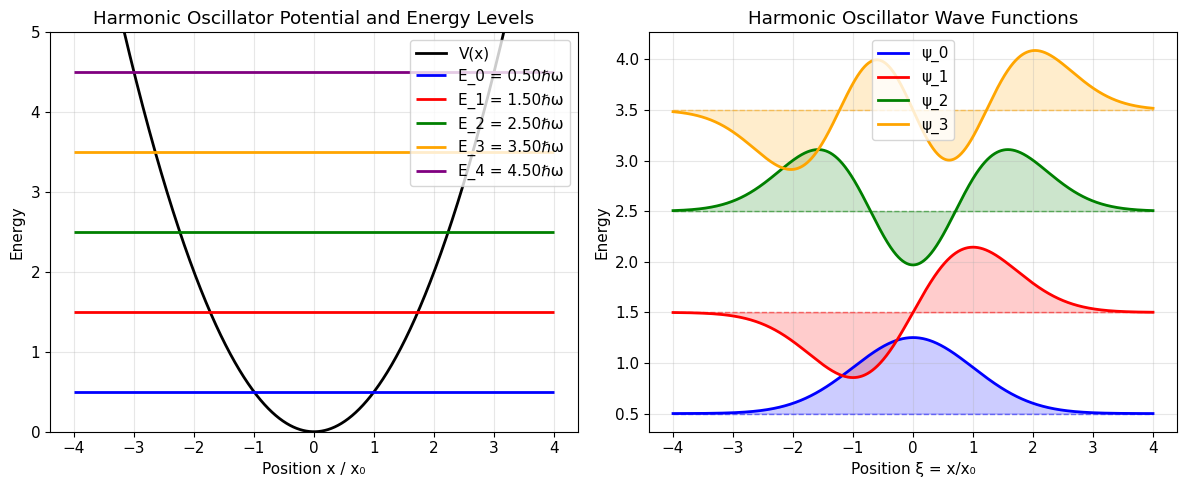

Quantum Harmonic Oscillator (m = ω = ℏ = 1)
Characteristic length x₀ = √(ℏ/mω) = 1.000000

Energy levels E_n = ℏω(n + 1/2):
  E_0 = 0.5ℏω
  E_1 = 1.5ℏω
  E_2 = 2.5ℏω
  E_3 = 3.5ℏω
  E_4 = 4.5ℏω
  E_5 = 5.5ℏω


In [7]:
# Quantum harmonic oscillator
# Using dimensionless units: ℏ = m = ω = 1

m = 1.0
omega = 1.0
hbar = 1.0

# Characteristic length scale
x0 = np.sqrt(hbar / (m * omega))

# Position range (in terms of x0)
xi = np.linspace(-4, 4, 2000)
x = xi * x0

# Potential
V = 0.5 * m * omega**2 * x**2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot potential and energy levels
ax1.plot(x, V, 'k-', linewidth=2, label='V(x)')

colors = ['blue', 'red', 'green', 'orange', 'purple']
for n in range(5):
    E_n = hbar * omega * (n + 0.5)
    ax1.hlines(E_n, -4*x0, 4*x0, colors=colors[n], linewidth=2, label=f'E_{n} = {E_n:.2f}ℏω')

ax1.set_xlabel('Position x / x₀')
ax1.set_ylabel('Energy')
ax1.set_title('Harmonic Oscillator Potential and Energy Levels')
ax1.set_ylim(0, 5)
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# Plot wave functions for n=0,1,2,3
for n, color in zip(range(4), colors):
    # Hermite polynomial
    H_n = hermite(n)
    psi_n = (1.0 / np.sqrt(2**n * np.math.factorial(n))) * H_n(xi) * np.exp(-xi**2 / 2)
    psi_n = psi_n * (1.0 / np.sqrt(np.sum(np.abs(psi_n)**2) * (xi[1]-xi[0])))
    
    E_n = hbar * omega * (n + 0.5)
    
    # Plot wave function shifted by its energy
    ax2.plot(xi, psi_n + E_n, color=color, linewidth=2, label=f'ψ_{n}')
    ax2.fill_between(xi, E_n, psi_n + E_n, alpha=0.2, color=color)
    ax2.hlines(E_n, -4, 4, colors=color, linewidth=1, linestyles='dashed', alpha=0.5)

ax2.set_xlabel('Position ξ = x/x₀')
ax2.set_ylabel('Energy')
ax2.set_title('Harmonic Oscillator Wave Functions')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print('Quantum Harmonic Oscillator (m = ω = ℏ = 1)')
print(f'Characteristic length x₀ = √(ℏ/mω) = {x0:.6f}')
print(f'\nEnergy levels E_n = ℏω(n + 1/2):')
for n in range(6):
    E_n = hbar * omega * (n + 0.5)
    print(f'  E_{n} = {E_n:.1f}ℏω')

## 7. Key Takeaways and Next Steps

### What we've learned:

1. **Wave functions** encode probability amplitudes; $|\psi|^2$ is probability density.
2. **Schrödinger equation** governs quantum evolution; for bound states, it yields discrete energy levels.
3. **Simple solvable systems** (infinite square well, harmonic oscillator) illustrate key quantum features:
   - **Quantization** of energy
   - **Zero-point energy** (ground state is never at rest)
   - **Node structure** of wave functions
4. **Expectation values** $\langle A \rangle$ are the only physical predictions quantum mechanics makes.
5. **Uncertainty principle** $\Delta x \Delta p \geq \hbar/2$ is fundamental, not a limitation of measurement.

### Exercises:

1. For the infinite square well (n=2), compute $\langle x \rangle$, $\Delta x$, and verify the uncertainty principle.
2. Plot the probability density for the ground state ($n=0$) and first excited state ($n=1$) of the harmonic oscillator.
3. Show that the ground state wave function $\psi_0(x) \propto e^{-x^2/2x_0^2}$ is an eigenstate of the harmonic oscillator with eigenvalue $\frac{1}{2}\hbar\omega$.

### Next topics:

- **Superposition and measurement:** what happens when we measure a quantum system?
- **Operators and commutators:** quantum mechanics of angular momentum and spin
- **Time-dependent perturbation theory:** how systems respond to external drives
- **Many-particle systems:** identical particles and the Pauli exclusion principle

## References

- **Griffiths**, *Introduction to Quantum Mechanics*, 3rd ed. (chapters 1–3 for this material)
- **Sakurai & Napolitano**, *Modern Quantum Mechanics*, 2nd ed.
- **Shankar**, *Principles of Quantum Mechanics*, 2nd ed.
- MIT OpenCourseWare: *Quantum Physics I* (8.04)